In [1]:
import os
import numpy as np
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2 # opencv

In [5]:
# make some library declarations
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

## Improving performance

In [54]:
num_classes = 100

data_dir = "/Users/aryamathew/Downloads/data/coil-100/"

images = []
classes = []
example_images = []
do_limit = False
max_per_class = 32
for i in range(num_classes):

    filenames = glob.glob(data_dir + 'obj' + str(i+1) + '_*.png')
    
    for j in range(len(filenames)):
        
        #print('reading ', filenames[j])
        im_gbr = cv2.imread(filenames[j])
        im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB) # convert from BGR ordering to RGB
        
        images.append(im)
        classes.append(i)

        if (j==0):
            example_images.append(im) # keep the first example of each class
            
        # limit to 10 images per example
        if do_limit:
            if (j>=max_per_class):
                break
                
print('read ', len(images), ' images ')

read  7200  images 


In [55]:
from skimage.color import rgb2gray
dataXout = []

for img, y in zip(images, classes):
    img2 = rgb2gray(img)
    img2 = np.array(img, dtype=np.float32) / 255.0
    dataXout.append(img2)

dataX = np.array(dataXout)
dataY = keras.utils.to_categorical(classes)

from sklearn.model_selection import train_test_split

X_trainVal, X_test, y_trainVal, y_test = train_test_split(dataX, dataY, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.25)

In [56]:
dataY.shape

(7200, 100)

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(100, activation='softmax'))

# compile and train it!
epochs = 10 # 100, 300, 500 you choose
batch_size = 32 # 32, 64, 128 you choose
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X,y,nb_epoch = 1000, batch_size = 4)
history=model.fit(X_train,y_train ,epochs = epochs, batch_size = batch_size)

Epoch 1/10
127/127 [==============================] - 12s 96ms/step - loss: 3.6818 - accuracy: 0.4600
Epoch 2/10
127/127 [==============================] - 12s 93ms/step - loss: 0.2056 - accuracy: 0.9563
Epoch 3/10
127/127 [==============================] - 12s 94ms/step - loss: 0.0616 - accuracy: 0.9862
Epoch 4/10
127/127 [==============================] - 12s 94ms/step - loss: 0.0182 - accuracy: 0.9978
Epoch 5/10
127/127 [==============================] - 12s 94ms/step - loss: 0.0202 - accuracy: 0.9960
Epoch 6/10
127/127 [==============================] - 12s 92ms/step - loss: 0.0043 - accuracy: 0.9995
Epoch 7/10
127/127 [==============================] - 12s 92ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
127/127 [==============================] - 12s 92ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
127/127 [==============================] - 12s 93ms/step - loss: 8.7597e-04 - accuracy: 1.0000
Epoch 10/10
127/127 [==============================] - 12s 93ms/step - loss: 7

dict_keys(['loss', 'accuracy'])


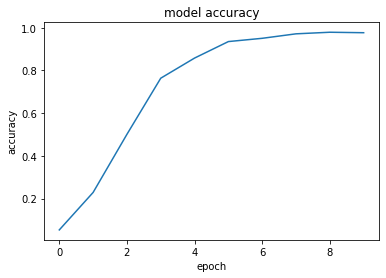

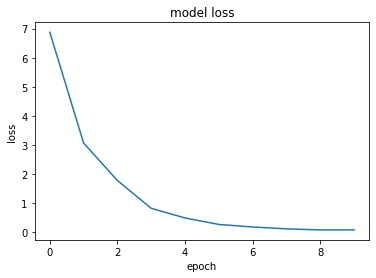

In [53]:
# this plots the change of accuracy and loss over time (stored in the 'history')

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()